# System of linear equations

2023-05-27

A system of linear equations is a collection of one or more linear equations involving the same variables, and the solution to the system is an assignment of values to the variables so that all equations are satisfied simultaneously.

Solve the linear equations:

$$x-y+2z-2 = 0 \tag{1}$$
$$2x+y-z-1 = 0 \tag{2}$$
$$-2x-5y+3z-3 = 0 \tag{3}$$

## Solving manually

Starting from Eq. (1):

$
x-y+2z-2 = 0 \\
\mathbf{x=y-2z+2} \qquad\text{(a)}
$

Replacing in Eq (2):

$
2(y-2z+2)+y-z-1=0 \\
2y-4z+4+y-z-1=0 \\
2y+y-4z-z=1-4 \\
3y-5z=-3\\
\mathbf{y=\frac{5}{3}z-1}\qquad\text{(b)}
$

Substituting Eq. (b) in Eq. (a):

$
x=\frac{5}{3}z-1-2z+2\\
x=z(\frac{5}{3}-2)-1+2\\
\mathbf{x=-\frac{z}{3}+1}\qquad\text{(c)}
$

Substituting Eq. (b) and (c) in Eq. (3):

$
-2(-\frac{z}{3}+1)-5(\frac{5}{3}z-1)+3z-3=0\\
\frac{2z}{3}-2-\frac{25z}{3}+5+3z-3=0\\
z(\frac{2z}{3}-\frac{25}{3}+3)=3-5+2\\
\mathbf{z=0}\qquad\text{(d)}
$

Substituting Eq. (d) in Eq. (c):

$
x=-\frac{0}{3}+1\\
\mathbf{x=1}
$

Substituting Eq. (d) in Eq. (b):

$
y=\frac{5}{3}0-1\\
\mathbf{y=-1}
$

Solution:

$
x=1;y=-1;z=0
$

## Solving using the library SymPy

[Sympy library](https://www.sympy.org/en/index.html) is a Python library for symbolic mathematics

In [1]:
from sympy import solve
from sympy.abc import x, y, z

In [4]:
solve([x - y + 2 * z - 2,
       2 * x + y - z - 1,
       -2 * x - 5 * y + 3 * z - 3],
      [x, y, z],
      dict=True)

[{x: 1, y: -1, z: 0}]

## Solving manually using Gaussian elimination

https://en.wikipedia.org/wiki/Gaussian_elimination

$
x-y+2z = 2\\
2x+y-z = 1\\
-2x-5y+3z = 3
$

$
\left[
\begin{array}{@{}ccc|c@{}}
1  & -1 &  2 & 2\\
2  &  1 & -1 & 1\\
-2 & -5 &  3 & 3\\
\end{array}
\right]
$

pivot = $a_{11}$ = 1

$m_{21} = \frac{2}{1} = 2$

$m_{31} = \frac{-2}{1} = 2$

$L_2 = L_2 - m_{21} L_1 $

$L_3 = L_3 - m_{31} L_1 $

$
\left[
\begin{array}{@{}ccc|c@{}}
1 & -1 &  2 &  2\\
0 &  3 & -5 & -3\\
0 & -7 &  7 &  7\\
\end{array}
\right]
$

pivot = $a_{22}$ = 3

$m_{32} = \frac{-7}{3}$

$L_3 = L_3 - m_{32} L_2 $

$
\left[
\begin{array}{@{}ccc|c@{}}
1 & -1 &  2 &  2\\
0 &  3 & -5 & -3\\
0 & 0 &  -\frac{14}{3} &  0\\
\end{array}
\right]
$

Replacing:

$
x-y+2z = 2\\
0+3y-5z = -3\\
0-0-\frac{14}{3}z = 0
$

Solving:

$
-\frac{14}{3}z = 0 \quad \implies \quad z = 0
$

$
3y -5\times0 = -3 \quad \implies \quad y=-1
$

$
x-(-1) + 5\times0 = 2  \quad \implies \quad x=1
$

Solution:

$
x=1;y=-1;z=0
$

$
\begin{bmatrix}
x\\
y\\
z\\
\end{bmatrix}
=
\begin{bmatrix}
1\\
-1\\
0\\
\end{bmatrix}
$

## Implementation

The implementation uses as input data a NumPy array containing the elements to be solved in the form of a matrix. The final output is the matrix containing the reduced triangular matrix. The implementation does not resolve the final individual values of each variable.

In [5]:
import numpy as np

In [6]:
matr = np.array([
    [1, -1, 2, 2],
    [2, 1, -1, 1],
    [-2, -5, 3, 3]],
    dtype=float)

In [7]:
N = matr.shape[0]
M = matr.shape[1]
for i in range(N - 1):
    print(f"Pivot = a({i+1},{i+1})")
    P = matr[i, i]
    L1 = matr[i, :]
    for j in range(i + 1, N):
        L = matr[j, :]
        m = matr[j, i] / P
        matr[j, :] = L - m * L1
    print(matr)

Pivot = a(1,1)
[[ 1. -1.  2.  2.]
 [ 0.  3. -5. -3.]
 [ 0. -7.  7.  7.]]
Pivot = a(2,2)
[[ 1.         -1.          2.          2.        ]
 [ 0.          3.         -5.         -3.        ]
 [ 0.          0.         -4.66666667  0.        ]]


The value of variable z is

In [11]:
matr[N - 1, M - 1] / matr[N - 1, M - 2]

-0.0

The value of variable y is

In [21]:
(matr[N-2,M-1] - z * matr[N-2,M-2]) / matr[N-2,M-3]

-1.0

The value of variable x is

In [24]:
(matr[N-3,M-1] - z * matr[N-3,M-2] - y * matr[N-3,M-3]) / matr[N-3,M-4]

1.0

# Exercise

Linear systems in vehicle traffic

Based on: http://www.ime.unicamp.br/~apmat/sistemas-lineares-algumas-aplicacoes/  (in Portuguese)

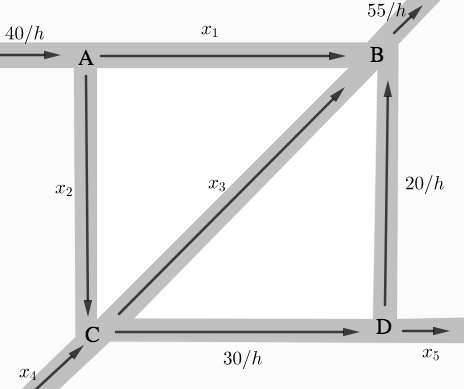

A=40, B=55, CB=10, CD=30, DB=20

| In | Out |
|---|---|
| $$40+x_4$$ | $$55+x5$$ |
| $$40$$ | $$x1+x2$$ |
| $$x_1+x_3+20$$ | $$55$$ |
| $$x_2+x_4$$ | $$x_3+30$$ |
| $$30$$ | $$20+x_5$$ |

In [110]:
def calc(A,B,CB,CD,DB):
    x1 = B - DB - CB
    x5 = CD - DB
    x2 = A - x1
    x4 = CB + CD - x2
    return x1, x2, x4, x5

Other simulations using other input values:

In [111]:
calc(40,55,10,30,20)

(25, 15, 25, 10)

In [112]:
calc(20,35,15,30,10)

(10, 10, 35, 20)

In [113]:
calc(10,15,55,35,20)

(-60, 70, 20, 15)

# Geometric interpretation of the system of linear equations

A system of linear equations is a collection of one or more linear equations involving the same variables, and which can be represented by planes in space.

The following figure represents a linear system with variables that determines a collection of planes in space. The point of intersection of the planes represents the solution of the linear system of equations.

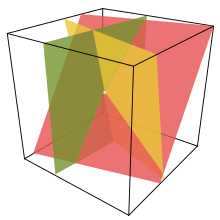<br>
Source: Wikipedia

Another example would be a system of equations with two variables, $x − y = −1$ and $3x + y = 9$, as represented by the figure below. The solution set for the linear equations presented is the single point (2, 3) that can be observed in the figure.

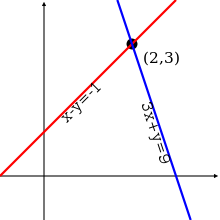

# References

- RUGGIERO, M. A. G.; LOPES, V. L. D. R. Cálculo numérico: aspectos teóricos e computacionais. [S. l.]: Pearson Makron Books, 1996. vol. 1
- Linear Systems - provocations. https://www.youtube.com/watch?v=nkGwpeFhg5c&list=PLGlKR3GY13JzNrWOt9Cfii_76iI8RSPeF
- Linear systems: some applications – Deriving mathematics.http://www.ime.unicamp.br/~apmat/sistemas-lineares-algumas-aplicacoes/
- Exercise lists. https://fmenino-cap-239.netlify.app/
- Matematica-computacional. https://github.com/M3nin0/matematica-computacional
- Linear system. https://en.wikipedia.org/wiki/Linear_system
- System of linear equations. https://en.wikipedia.org/wiki/System_of_linear_equations
- SymPy, a Python library for symbolic mathematics. https://www.sympy.org/en/index.html